<a href="https://colab.research.google.com/github/HoanDiep/BT8_tuan9/blob/main/mnist_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [47]:
train_images.shape

(60000, 28, 28)

In [48]:
test_images.shape

(10000, 28, 28)

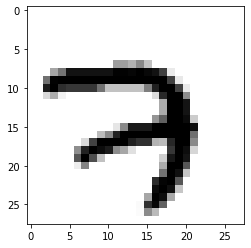

so nay la 7


In [49]:
import matplotlib.pyplot as plt
hinh = train_images[5000]
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show()
print('so nay la',train_labels[5000])

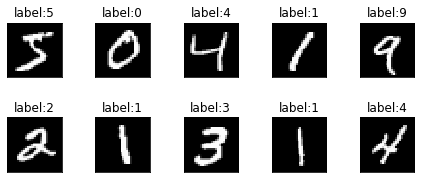

In [50]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray',interpolation='none')
  plt.title("label:{}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

In [51]:
from keras.models import Sequential
from keras.layers import Dense

In [52]:
model1=Sequential()
model1.add(Dense(512,activation ='relu',input_shape=(28*28,)))
model1.add(Dense(10,activation='softmax'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [53]:
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [54]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255

In [55]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

In [56]:
model1.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model1.fit(train_images,train_labels,epochs=10,batch_size=28)
test_loss,test_acc=model1.evaluate(test_images,test_labels)

print('test_acc:',test_acc)
print('test_loss:',test_loss)

Epoch 1/10
2143/2143 [==============================] - 17s 8ms/step - loss: 0.1989 - accuracy: 0.9416
Epoch 2/10
2143/2143 [==============================] - 15s 7ms/step - loss: 0.0862 - accuracy: 0.9739
Epoch 3/10
2143/2143 [==============================] - 15s 7ms/step - loss: 0.0617 - accuracy: 0.9819
Epoch 4/10
2143/2143 [==============================] - 16s 8ms/step - loss: 0.0461 - accuracy: 0.9870
Epoch 5/10
2143/2143 [==============================] - 15s 7ms/step - loss: 0.0349 - accuracy: 0.9897
Epoch 6/10
2143/2143 [==============================] - 14s 7ms/step - loss: 0.0275 - accuracy: 0.9917
Epoch 7/10
2143/2143 [==============================] - 14s 7ms/step - loss: 0.0229 - accuracy: 0.9935
Epoch 8/10
2143/2143 [==============================] - 14s 7ms/step - loss: 0.0161 - accuracy: 0.9954
Epoch 9/10
2143/2143 [==============================] - 14s 7ms/step - loss: 0.0134 - accuracy: 0.9961
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss

In [57]:
model1.save('model1.h5')

In [58]:

from keras.models import load_model
model1 = load_model('model1.h5')


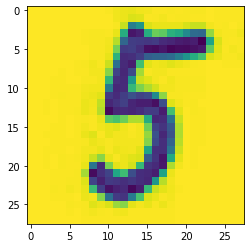

In [76]:
from keras.utils import load_img
import matplotlib.pyplot as plt
img0 = load_img('so5.jpg',target_size=(28,28),color_mode='grayscale')
plt.imshow(img0)

In [78]:
#model1 = load_model('model1.h5')

import numpy as np

img0 = np.array(img0)
img0.shape
img0 = img0.reshape(1,28*28)
img0 = img0.astype('float32') / 255
predicted_label = model1.predict(img0).argmax()
print("Predicted label is {}".format(predicted_label))



1/1 [==============================] - 0s 27ms/step
Predicted label is 5


In [ ]:
####################################################################

In [ ]:
from keras.datasets import cifar10
from keras.models import Sequential
import matplotlib.pyplot as plt

(x_trains, y_trains) ,(x_test, y_test) = cifar10.load_data()

print(len(x_trains))


50000


In [ ]:
x_trains.shape

(50000, 32, 32, 3)

In [ ]:
y_trains.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:

from keras.layers import Dense

model=Sequential()
model.add(Dense(512,input_shape=(32*32*3,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_trains = x_trains.reshape((50000,32*32*3))
x_trains = x_trains.astype('float32')/255

In [ ]:
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
y_trains = to_categorical(y_trains)
y_test = to_categorical(y_test)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_trains,y_trains,epochs=10,batch_size=32)
test_loss,test_acc=model.evaluate(x_test,y_test)

print('test_acc:',test_acc)
print('test_loss:',test_loss)

Epoch 1/10
1563/1563 [==============================] - 41s 25ms/step - loss: 1.8639 - accuracy: 0.3227
Epoch 2/10
1563/1563 [==============================] - 38s 25ms/step - loss: 1.6775 - accuracy: 0.3963
Epoch 3/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5943 - accuracy: 0.4287
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.5382 - accuracy: 0.4485
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4981 - accuracy: 0.4617
Epoch 6/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4711 - accuracy: 0.4715
Epoch 7/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4424 - accuracy: 0.4836
Epoch 8/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4161 - accuracy: 0.4937
Epoch 9/10
1563/1563 [==============================] - 38s 25ms/step - loss: 1.3893 - accuracy: 0.5028
Epoch 10/10
313/313 [==============================] - 2s 6ms/st

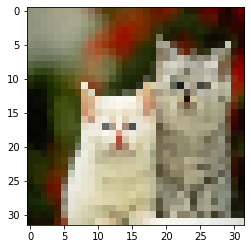

In [ ]:
from keras.utils import load_img
import matplotlib.pyplot as plt
img = load_img('meo1.jpg',target_size=(32,32))
plt.imshow(img)


In [ ]:
import numpy as np
from keras.utils.image_utils import img_to_array
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 33ms/step


array([3])

In [ ]:
model.save('model2.h5')